# 0. Packages and data

In [1]:
cd ..

c:\Users\pjsta\GitHub\BeStarsMiMeS


In [2]:
! git clone https://github.com/folsomcp/specpolFlow.git

fatal: destination path 'specpolFlow' already exists and is not an empty directory.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
import specpolFlow as pol

loading specpolFlow package


In [5]:
from matplotlib.backends.backend_pdf import PdfPages


In [6]:
import pandas as pd
sheet_id = '1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk'
sheet_name = 'Stars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData=pd.read_csv(url)

sheet_name = 'Observations'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
Observations=pd.read_csv(url)

In [7]:
import itertools


### This gets rid of the warnings in the cells where it is creating more than 20 figures (i.e. 1.2)
#### Not needed for this notebook but could be useful in the future
#import warnings
#warnings.filterwarnings("default", message="More than 20 figures have been opened.")


# 1. Comparison with Normal B Stars


In [34]:
sheet_id = '1Hle6DgGcse92VdarqZma1nje5xYwlJwnAkMStMba1xU'
sheet_name = 'Bstars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData=pd.read_csv(url)
 
models=['hybrid_maskdepth0.1_tellClean',
 'hybrid_maskdepth0.02_tellClean',
 'hybrid_CleanAsif+tellClean',
 'hybrid_CleanAsifTweak+tellClean',
 'normalized_maskdepth0.1_tellClean',
 'normalized_maskdepth0.02_tellClean',
 'normalized_CleanAsif+tellClean',
 'normalized_CleanAsifTweak+tellClean']

#model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(models[0]))
model=pd.read_csv('04-Bz-calculations/{}.csv'.format(models[0]))
v_sig=np.abs(model['V bz sig (G)'])*3.0

Bstar_vsini=np.array([])
Bstar_Bz=np.array([])
for i in range(StarData['sigma'].size):
  if np.isnan(float(StarData['sigma'][i])):
    continue
  else:
    Bstar_Bz=np.append(Bstar_Bz,3*
    StarData['sigma'][i])
    Bstar_vsini=np.append(Bstar_vsini,StarData['vsini'][i])


MBstar_Bz=np.array([])
MBstar_vsini=np.array([])
for i in range(StarData['sigma'].size):
  if type(StarData['sigma'][i])!=str:
    if StarData['Det Flag'][i]!='ND':
      MBstar_Bz=np.append(MBstar_Bz,StarData['sigma'][i]*3)
      MBstar_vsini=np.append(MBstar_vsini,StarData['vsini'][i])

In [35]:
print('B star 3sig Upper limit median',np.median(np.abs(Bstar_Bz)),'mean',np.mean(np.abs(Bstar_Bz)))
print('Magnetic B star 3sig Upper limit median',np.median(np.abs(MBstar_Bz)),'mean',np.mean(np.abs(MBstar_Bz)))
print('Be star 3sig Upper limit median',np.median(np.abs(v_sig)),'mean',np.mean(np.abs(v_sig)))
#np.median(v_sig)

MBstar_Bz.size

#not random sample --> detection bias

B star 3sig Upper limit median 85.2849 mean 404.68013909774436
Magnetic B star 3sig Upper limit median nan mean nan
Be star 3sig Upper limit median 280.2456628798434 mean 784.6445986992074


422

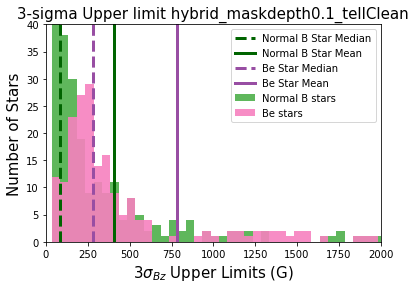

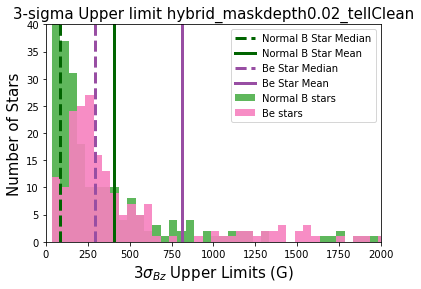

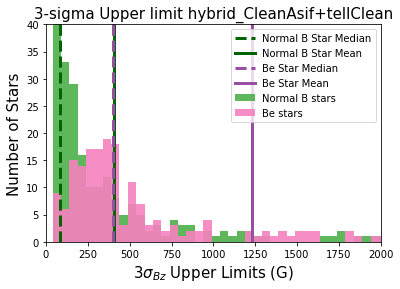

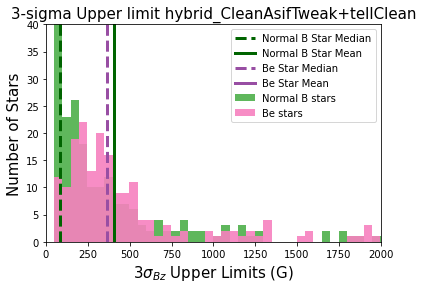

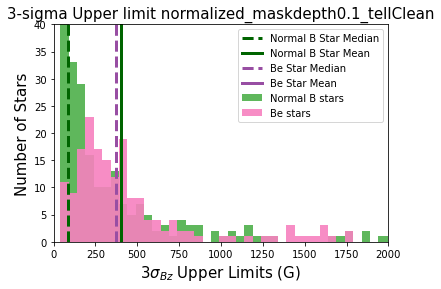

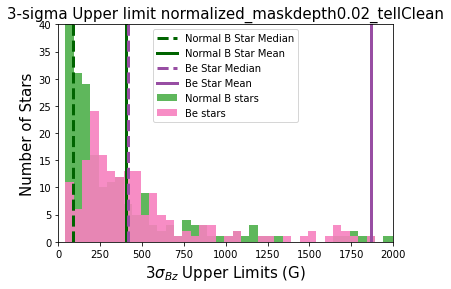

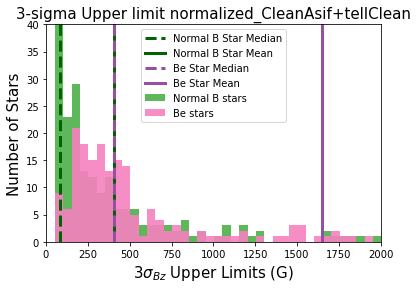

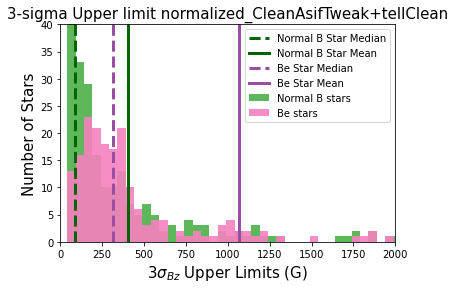

"\n  plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)\n  plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf')\n  plt.xlabel('$3\\sigma_{Bz}$ Upper Limits',size=15)\n  plt.ylabel('Number of Stars',size=15)\n  plt.title('3-sigma Upper limit (No Scaling)',size=15)\n  plt.legend()\n  plt.show()\n\n\n  plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)\n  plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf')\n  plt.xlabel('$3\\sigma_{Bz}$ Upper Limits',size=15)\n  plt.ylabel('Number of Stars',size=15)\n  plt.ylim(0,50)\n  plt.title('3-sigma Upper limit (Scaled y-axis)',size=15)\n  plt.legend()\n  plt.show()\n"

In [36]:
#makes some histograms

for i in range(len(models)):

  #model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(models[i]))
  model=pd.read_csv('04-Bz-calculations/{}.csv'.format(models[i]))
  v_sig=np.abs(model['V bz sig (G)'])*3.0

  binwidth=50
  bins=np.arange(min(v_sig), max(v_sig) + binwidth, binwidth)
  
  #plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
  #plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf') 
  #plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
  #plt.ylabel('Number of Stars',size=15)
  #plt.ylim(0,50)
  #plt.xlim(0,2000)
  #plt.title('3-sigma Upper limit (Scaled x- and y-axis)',size=15)
  #plt.legend()
  #plt.show()

 
  plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
  #plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf') 
  plt.hist(v_sig,label='{}'.format('Be stars'),bins=bins,alpha=0.9,color='#f781bf')

  plt.axvline(np.median(np.abs(Bstar_Bz)),color='darkgreen',linewidth=3,alpha=1,linestyle='dashed', label='Normal B Star Median')
  plt.axvline(np.mean(np.abs(Bstar_Bz)),color='darkgreen',linewidth=3,alpha=1,linestyle='solid', label='Normal B Star Mean')
  plt.axvline(np.median(np.abs(v_sig)),color='#984ea3',linewidth=3,alpha=1,linestyle='dashed', label='Be Star Median')
  plt.axvline(np.mean(np.abs(v_sig)),color='#984ea3',linewidth=3,alpha=1,linestyle='solid', label='Be Star Mean')

  plt.xlabel('$3\sigma_{Bz}$ Upper Limits (G)',size=15)
  plt.ylabel('Number of Stars',size=15)
  plt.ylim(0,40)
  plt.xlim(0,2000)
  plt.title('3-sigma Upper limit {}'.format(models[i]),size=15)
  plt.legend()
  plt.show()

'''
  plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
  plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf')
  plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
  plt.ylabel('Number of Stars',size=15)
  plt.title('3-sigma Upper limit (No Scaling)',size=15)
  plt.legend()
  plt.show()


  plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
  plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf')
  plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
  plt.ylabel('Number of Stars',size=15)
  plt.ylim(0,50)
  plt.title('3-sigma Upper limit (Scaled y-axis)',size=15)
  plt.legend()
  plt.show()
'''

In [41]:
import pandas as pd
sheet_id = '1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk'
sheet_name = 'Stars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData=pd.read_csv(url)

sheet_name = 'Observations'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
Observations=pd.read_csv(url)

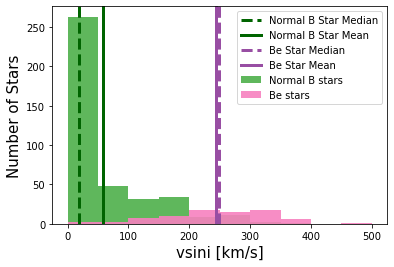

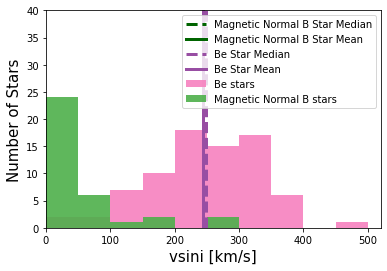

In [42]:
#makes some histograms


Bevsini=StarData['Adopted-vsini']

binwidth=50
bins=np.arange(0, max(Bevsini) + binwidth, binwidth)

plt.hist(np.abs(Bstar_vsini),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
plt.hist(Bevsini,label='{}'.format('Be stars'),bins=bins,alpha=0.9,color='#f781bf')

#plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf') 
plt.axvline(np.median(np.abs(Bstar_vsini)),color='darkgreen',linewidth=3,alpha=1,linestyle='dashed', label='Normal B Star Median')
plt.axvline(np.mean(np.abs(Bstar_vsini)),color='darkgreen',linewidth=3,alpha=1,linestyle='solid', label='Normal B Star Mean')
plt.axvline(np.median(np.abs(Bevsini)),color='#984ea3',linewidth=3,alpha=1,linestyle='dashed', label='Be Star Median')
plt.axvline(np.mean(np.abs(Bevsini)),color='#984ea3',linewidth=3,alpha=1,linestyle='solid', label='Be Star Mean')

plt.xlabel('vsini [km/s]',size=15)
plt.ylabel('Number of Stars',size=15)
#plt.ylim(0,20)
#plt.xlim(0,2000)
#plt.title('vsini [km/s]',size=15)
plt.legend()
plt.show()

plt.hist(Bevsini,label='{}'.format('Be stars'),bins=bins,alpha=0.9,color='#f781bf')
plt.hist(np.abs(MBstar_vsini),label='Magnetic Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)

#plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf') 
plt.axvline(np.median(np.abs(MBstar_vsini)),color='darkgreen',linewidth=3,alpha=1,linestyle='dashed', label='Magnetic Normal B Star Median')
plt.axvline(np.mean(np.abs(MBstar_vsini)),color='darkgreen',linewidth=3,alpha=1,linestyle='solid', label='Magnetic Normal B Star Mean')
plt.axvline(np.median(np.abs(Bevsini)),color='#984ea3',linewidth=3,alpha=1,linestyle='dashed', label='Be Star Median')
plt.axvline(np.mean(np.abs(Bevsini)),color='#984ea3',linewidth=3,alpha=1,linestyle='solid', label='Be Star Mean')
plt.xlabel('vsini [km/s]',size=15)
plt.ylabel('Number of Stars',size=15)
plt.ylim(0,40)
plt.xlim(0,520)
#plt.title('vsini [km/s]',size=15)
plt.legend()
plt.show()

# 2. Comparison with Normal B Stars (Well Behaved Stars)


In [45]:
sheet_id = '1Hle6DgGcse92VdarqZma1nje5xYwlJwnAkMStMba1xU'
sheet_name = 'Bstars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData=pd.read_csv(url)

#model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(models[0]))
model=pd.read_csv('04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(models[0]))
v_sig=np.abs(model['V bz sig (G)'])*3.0

Bstar_vsini=np.array([])
Bstar_Bz=np.array([])
for i in range(StarData['sigma'].size):
  if np.isnan(StarData['sigma'][i]):
    continue
  else:
    Bstar_Bz=np.append(Bstar_Bz,3*
    StarData['sigma'][i])
    Bstar_vsini=np.append(Bstar_vsini,StarData['vsini'][i])


MBstar_Bz=np.array([])
MBstar_vsini=np.array([])
for i in range(StarData['sigma'].size):
  if type(StarData['sigma'][i])!=str:
    if StarData['Det Flag'][i]!='ND':
      MBstar_Bz=np.append(MBstar_Bz,StarData['sigma'][i]*3)
      MBstar_vsini=np.append(MBstar_vsini,StarData['vsini'][i])

In [46]:
print('B star 3sig Upper limit median',np.median(np.abs(Bstar_Bz)),'mean',np.mean(np.abs(Bstar_Bz)))
print('Magnetic B star 3sig Upper limit median',np.median(np.abs(MBstar_Bz)),'mean',np.mean(np.abs(MBstar_Bz)))
print('Be star 3sig Upper limit median',np.median(np.abs(v_sig)),'mean',np.mean(np.abs(v_sig)))
#np.median(v_sig)

MBstar_Bz.size

#not random sample --> detection bias

B star 3sig Upper limit median 85.2849 mean 404.68013909774436
Magnetic B star 3sig Upper limit median nan mean nan
Be star 3sig Upper limit median 348.4623702777634 mean 523.8671818915678


422

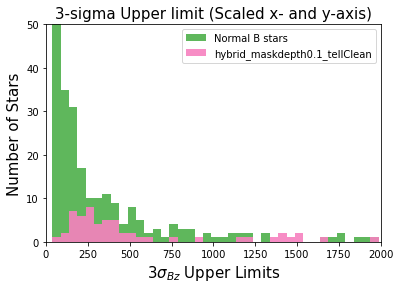

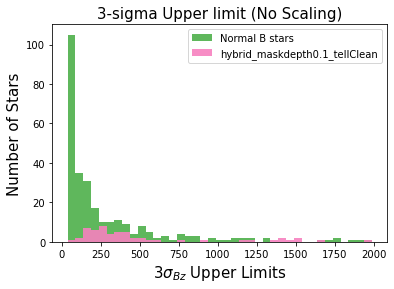

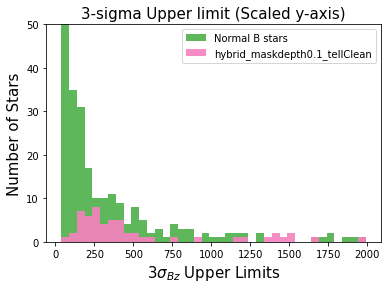

In [47]:
#makes some histograms

#model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(models[0]))
model=pd.read_csv('04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(models[0]))
v_sig=np.abs(model['V bz sig (G)'])*3.0
binwidth=50

bins=np.arange(min(v_sig), max(v_sig) + binwidth, binwidth)
plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
plt.hist(v_sig,label='{}'.format(models[0]),bins=bins,alpha=0.9,color='#f781bf')
#for i in range(MBstar_Bz.size):
#  plt.axvline(np.abs(MBstar_Bz[i]),color='C2',linewidth=1,alpha=0.5)
plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
plt.ylabel('Number of Stars',size=15)
plt.ylim(0,50)
plt.xlim(0,2000)
plt.title('3-sigma Upper limit (Scaled x- and y-axis)',size=15)
plt.legend()
plt.show()


plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
plt.hist(v_sig,label='{}'.format(models[0]),bins=bins,alpha=0.9,color='#f781bf')
plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
plt.ylabel('Number of Stars',size=15)
#plt.ylim(0,50)
#plt.xlim(0,2000)
plt.title('3-sigma Upper limit (No Scaling)',size=15)
plt.legend()
plt.show()

plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
plt.hist(v_sig,label='{}'.format(models[0]),bins=bins,alpha=0.9,color='#f781bf')
plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
plt.ylabel('Number of Stars',size=15)
plt.ylim(0,50)
#plt.xlim(0,2000)
plt.title('3-sigma Upper limit (Scaled y-axis)',size=15)
plt.legend()
plt.show()


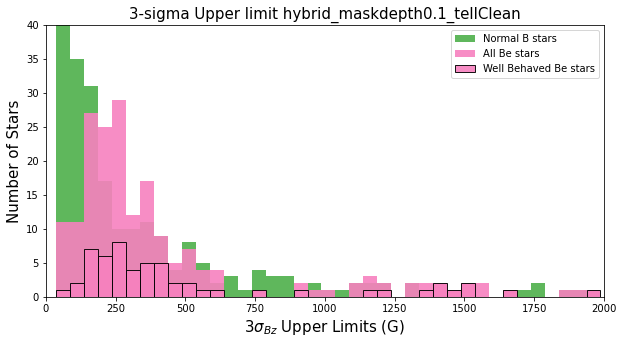

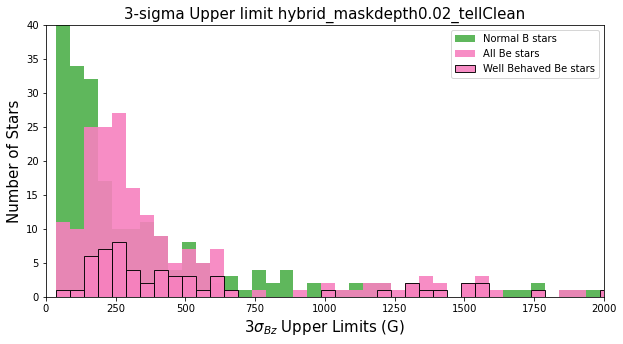

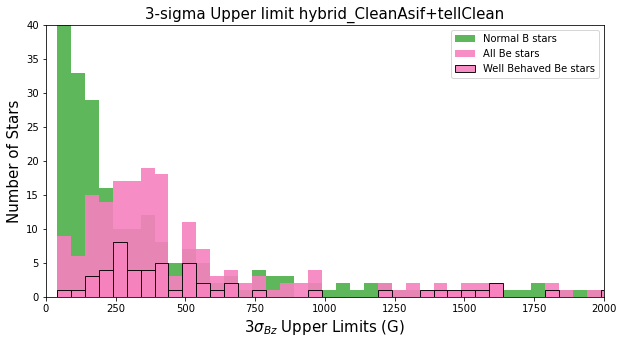

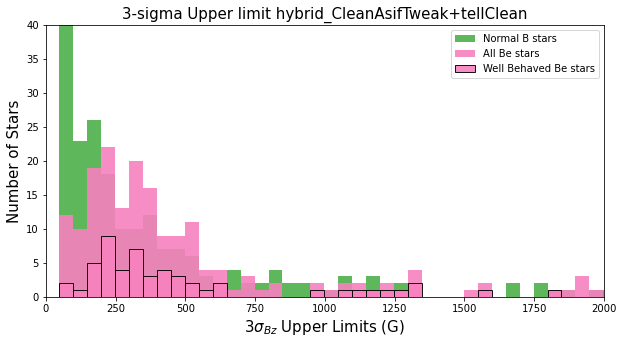

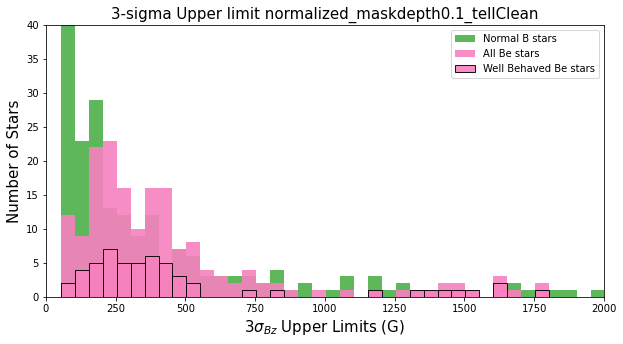

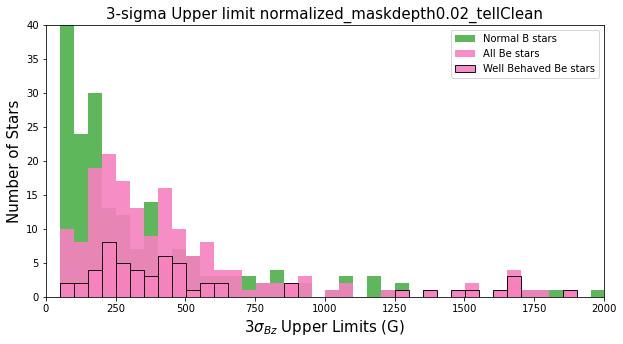

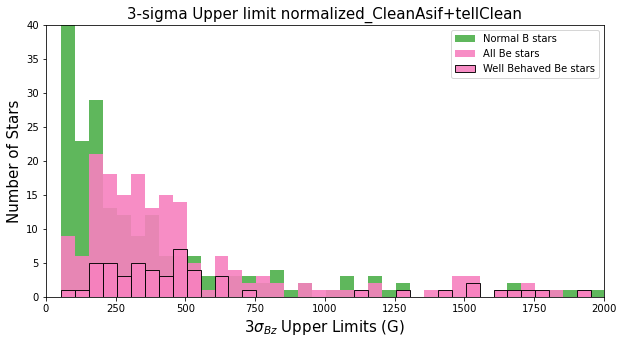

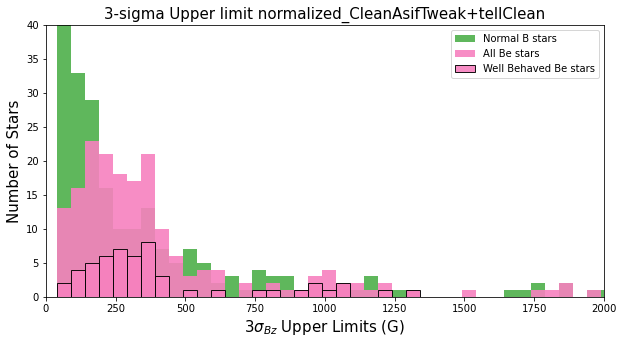

In [88]:
#makes some histograms
with PdfPages('04-Bz-calculations/3SigmaBz_hist.pdf') as pdf:
  for i in range(len(models)):
    model=pd.read_csv('04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(models[i]))

    #model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
    v_sig=np.abs(model['V bz sig (G)'])*3.0

    modelall=pd.read_csv('04-Bz-calculations/{}.csv'.format(models[i]))
    v_sigall=np.abs(modelall['V bz sig (G)'])*3.0

    binwidth=50
    bins=np.arange(min(v_sig), max(v_sig) + binwidth, binwidth)

    #plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
    #plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf') 
    #plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
    #plt.ylabel('Number of Stars',size=15)
    #plt.ylim(0,50)
    #plt.xlim(0,2000)
    #plt.title('3-sigma Upper limit (Scaled x- and y-axis)',size=15)
    #plt.legend()
    #plt.show()

    fig, ax = plt.subplots(1,1, figsize=(10,5))
    ax.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
    ax.hist(v_sigall,label='{}'.format('All Be stars'),bins=bins,alpha=0.9,color='#f781bf') 
    ax.hist(v_sig,label='{}'.format('Well Behaved Be stars'),bins=bins,alpha=0.9,color='#f781bf',edgecolor='black')

    #plt.axvline(np.median(np.abs(Bstar_Bz)),color='darkgreen',linewidth=3,alpha=1,linestyle='dashed', label='Normal B Star Median')
    #plt.axvline(np.mean(np.abs(Bstar_Bz)),color='darkgreen',linewidth=3,alpha=1,linestyle='solid', label='Normal B Star Mean')
    #plt.axvline(np.median(np.abs(v_sigall)),color='brown',linewidth=3,alpha=1,linestyle='dashed', label='All Be Star Median')
    #plt.axvline(np.mean(np.abs(v_sigall)),color='brown',linewidth=3,alpha=1,linestyle='solid', label='All Be Star Mean')
    #plt.axvline(np.median(np.abs(v_sig)),color='#984ea3',linewidth=3,alpha=1,linestyle='dashed', label='Well Behaved Be Star Median')
    #plt.axvline(np.mean(np.abs(v_sig)),color='#984ea3',linewidth=3,alpha=1,linestyle='solid', label='Well Behaved Be Star Mean')

    ax.set_xlabel('$3\sigma_{Bz}$ Upper Limits (G)',size=15)
    ax.set_ylabel('Number of Stars',size=15)
    ax.set_ylim(0,40)
    ax.set_xlim(0,2000)
    #plt.title('3-sigma Upper limit Comparison')#.format(models[i]),size=15)
    ax.set_title('3-sigma Upper limit {}'.format(models[i]),size=15)
    ax.legend()
    pdf.savefig(fig)
    '''
    plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
    plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf')
    plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
    plt.ylabel('Number of Stars',size=15)
    plt.title('3-sigma Upper limit (No Scaling)',size=15)
    plt.legend()
    plt.show()


    plt.hist(np.abs(Bstar_Bz),label='Normal B stars',bins=bins,color='#4daf4a',alpha=0.9)
    plt.hist(v_sig,label='{}'.format(models[i]),bins=bins,alpha=0.9,color='#f781bf')
    plt.xlabel('$3\sigma_{Bz}$ Upper Limits',size=15)
    plt.ylabel('Number of Stars',size=15)
    plt.ylim(0,50)
    plt.title('3-sigma Upper limit (Scaled y-axis)',size=15)
    plt.legend()
    plt.show()
    '''

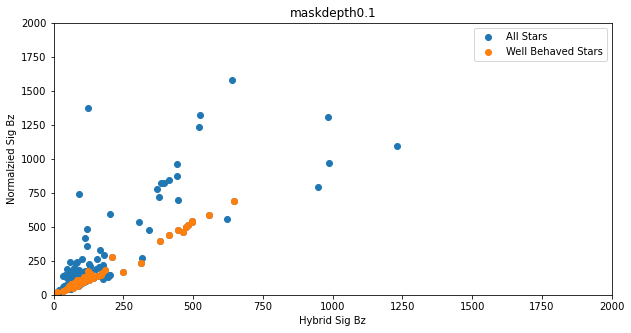

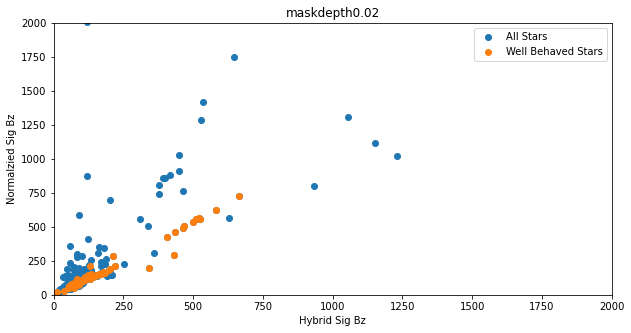

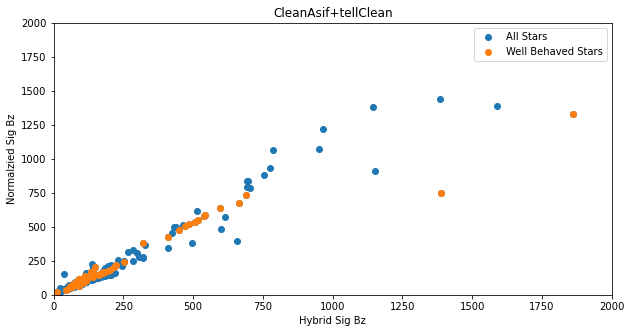

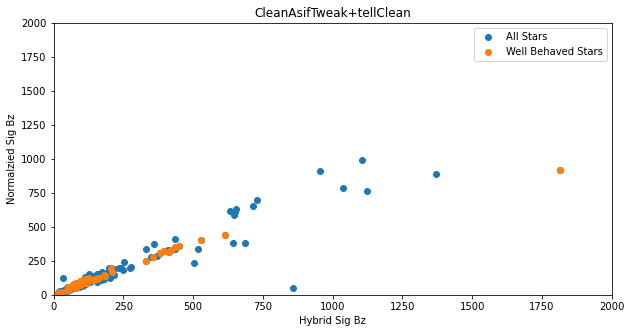

In [89]:
with PdfPages('04-Bz-calculations/SigmaBz_hybridvnorm.pdf') as pdf:
    for i in range(4):

        model1=pd.read_csv('04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(models[i]))
        #model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
        v_sig1=np.abs(model1['V bz sig (G)'])

        modelall1=pd.read_csv('04-Bz-calculations/{}.csv'.format(models[i]))
        v_sigall1=np.abs(modelall1['V bz sig (G)'])

        model2=pd.read_csv('04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(models[i+4]))
        #model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
        v_sig2=np.abs(model2['V bz sig (G)'])

        modelall2=pd.read_csv('04-Bz-calculations/{}.csv'.format(models[i+4]))
        v_sigall2=np.abs(modelall2['V bz sig (G)'])


        fig, ax = plt.subplots(1,1, figsize=(10,5))

        ax.scatter(v_sigall1, v_sigall2, label='All Stars')
        ax.scatter(v_sig1,v_sig2, label='Well Behaved Stars')
        ax.legend()
        ax.set_xlabel('Hybrid Sig Bz')
        ax.set_ylabel('Normalzied Sig Bz')
        ax.set_title('{}'.format(models[i].split('_')[1]))
        ax.set_xlim(0,2000)
        ax.set_ylim(0,2000)
        pdf.savefig(fig)

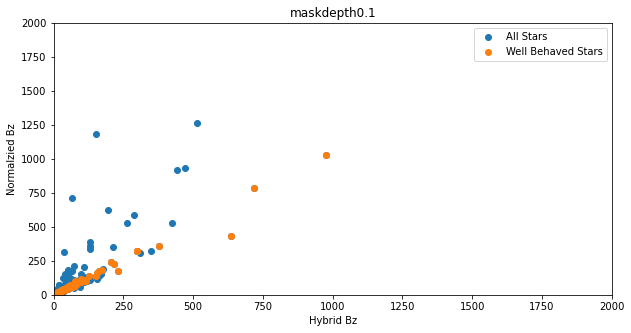

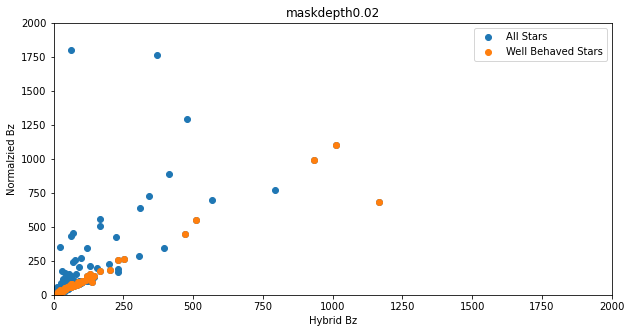

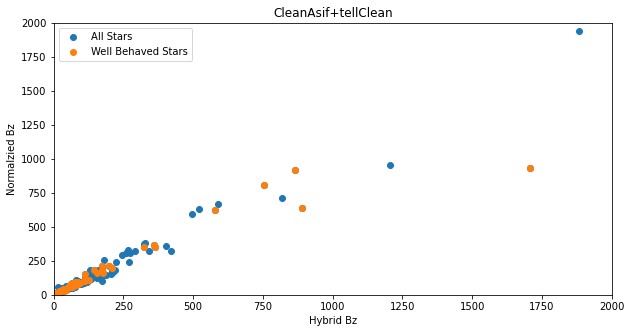

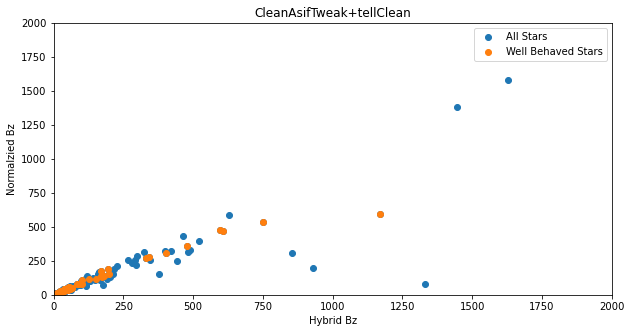

In [90]:
with PdfPages('04-Bz-calculations/Bz_hybridvnorm.pdf') as pdf:
    for i in range(4):

        model1=pd.read_csv('04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(models[i]))
        #model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
        v_sig1=np.abs(model1['V bz (G)'])

        modelall1=pd.read_csv('04-Bz-calculations/{}.csv'.format(models[i]))
        v_sigall1=np.abs(modelall1['V bz (G)'])

        model2=pd.read_csv('04-Bz-calculations/WellBehavedStars/{}_GOOD.csv'.format(models[i+4]))
        #model=pd.read_csv('/content/drive/Shareddrives/BeStarsMiMeS/04-Bz-calculations/{}.csv'.format(models[i]))
        v_sig2=np.abs(model2['V bz (G)'])

        modelall2=pd.read_csv('04-Bz-calculations/{}.csv'.format(models[i+4]))
        v_sigall2=np.abs(modelall2['V bz (G)'])


        fig, ax = plt.subplots(1,1, figsize=(10,5))

        ax.scatter(v_sigall1, v_sigall2, label='All Stars')
        ax.scatter(v_sig1,v_sig2, label='Well Behaved Stars')
        ax.legend()
        ax.set_xlabel('Hybrid Bz')
        ax.set_ylabel('Normalzied Bz')
        ax.set_title('{}'.format(models[i].split('_')[1]))
        ax.set_xlim(0,2000)
        ax.set_ylim(0,2000)
        pdf.savefig(fig)